<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r9-unbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-3-r9.csv?token=AKVFSOBGIFV7NJZFCZXMKYC6ZOH3S')
print(df.shape)
df

(33397, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,138,2,4,4,1,1,5,17,24,8,3,3,3,5,1,0.200000,8,5,1,5,5,25,8,4,4,12,20,85,100,1
1,139,2,4,4,2,2,5,17,24,8,3,3,3,5,1,0.200000,9,4,2,5,8,40,8,8,16,48,20,85,100,1
2,140,2,4,4,3,2,5,17,24,8,3,3,3,5,1,0.200000,10,3,3,5,9,45,8,12,24,72,20,85,100,1
3,141,2,4,4,4,2,5,17,24,8,3,3,3,5,1,0.200000,11,2,4,5,8,40,8,16,32,96,20,85,100,1
4,145,2,4,4,5,3,5,17,24,8,3,3,3,5,1,0.200000,15,1,5,5,5,25,8,20,60,180,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33392,3268003,1,3,5,3,2,3,9,3,3,29,13,20034,5,4,0.800000,34,1,1,1,1,1,3,15,30,601020,15,27,45,1
33393,3268010,1,3,5,4,2,3,9,3,3,29,13,20034,5,4,0.800000,41,1,1,1,1,1,3,20,40,801360,15,27,45,1
33394,3268017,1,3,5,5,3,3,9,3,3,29,13,20034,5,4,0.800000,48,1,1,1,1,1,3,25,75,1502550,15,27,45,1
33395,3268018,1,3,1,1,4,3,10,3,3,29,13,20035,5,4,0.800000,48,1,1,1,1,1,3,1,4,80140,3,30,9,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-1-r9.csv?token=AKVFSODGPMPUAUAOWEQSQRS6ZOH3Y')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-6-r9.csv?token=AKVFSODCJFFO2ZGZSH27L226ZOH34')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-9-r9.csv?token=AKVFSOGKBXM6MELNMZJRIAS6ZOH5G')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-14-r9.csv?token=AKVFSOGDB7YHIEAVN7UNATC6ZOH5G')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-5-r9.csv?token=AKVFSOHKLKOS52RDA7VMNY26ZOIFQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-12-r9.csv?token=AKVFSOH7MZUVG44ZXSLDTFK6ZOIFU')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-15-r9.csv?token=AKVFSOA7CCJCTLRZOPJZR7C6ZOIFY')

In [23]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(58262, 30)
(50365, 30)
(102290, 30)
(52871, 30)
(41344, 30)
(36404, 30)
(45935, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [25]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,9,9,23,7,3,3,0,0.0,4,6,1,6,6,36,0,1,4,12,3,27,9,0
1,84,0,3,4,1,1,5,17,23,7,9,9,3,3,3,1.0,16,5,2,6,10,60,0,4,4,12,20,85,100,0
2,85,0,3,4,2,2,5,17,23,7,9,9,3,3,3,1.0,17,4,3,6,12,72,0,8,16,48,20,85,100,0
3,86,0,3,4,3,2,5,17,23,7,9,9,3,3,3,1.0,18,3,4,6,12,72,0,12,24,72,20,85,100,0
4,87,0,3,4,4,2,5,17,23,7,9,9,3,3,3,1.0,19,2,5,6,10,60,0,16,32,96,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420863,3275759,2,0,4,1,1,5,20,24,8,15,15,20062,4,0,0.0,5,1,1,1,1,1,0,4,4,80248,20,100,100,1
420864,3275760,2,0,4,2,2,5,20,24,8,15,15,20062,4,0,0.0,6,1,1,1,1,1,0,8,16,320992,20,100,100,1
420865,3275761,2,0,4,3,2,5,20,24,8,15,15,20062,4,0,0.0,7,1,1,1,1,1,0,12,24,481488,20,100,100,1
420866,3275762,2,0,4,4,2,5,20,24,8,15,15,20062,4,0,0.0,8,1,1,1,1,1,0,16,32,641984,20,100,100,1


In [26]:
df.shape

(420868, 30)

Test Data

In [27]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-2-r9.csv?token=AKVFSOGRZKOSMWOBVNBHDJC6ZOILA')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-5-r9.csv?token=AKVFSOG655OFMIR2S7UXTPK6ZOILG')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-10-r9.csv?token=AKVFSODB7QZJCLIN7TAI2OC6ZOILK')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-12-r9.csv?token=AKVFSODHUDZNIO7KJRHISI26ZOILQ')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-13-r9.csv?token=AKVFSOGKWXNWXTCPU2HVQ6K6ZOILU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-malicious-n-0-3-m-15-r9.csv?token=AKVFSOA4IMO6422J72M3N226ZOILY')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r9/2-fft-normal-n-0-10-r9.csv?token=AKVFSOCXONCGY3QGYZZTLOS6ZOJDA')

print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(50365, 30)
(57956, 30)
(61327, 30)
(53372, 30)
(76773, 30)
(53141, 30)
(45272, 30)


In [28]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,138,2,4,4,1,1,5,17,24,8,3,3,4,5,1,0.200000,8,10,1,10,10,100,8,4,4,16,20,85,100,0
1,139,2,4,4,2,2,5,17,24,8,3,3,4,5,1,0.200000,9,9,2,10,18,180,8,8,16,64,20,85,100,0
2,140,2,4,4,3,2,5,17,24,8,3,3,4,5,1,0.200000,10,8,3,10,24,240,8,12,24,96,20,85,100,0
3,141,2,4,4,4,2,5,17,24,8,3,3,4,5,1,0.200000,11,7,4,10,28,280,8,16,32,128,20,85,100,0
4,145,2,4,4,5,3,5,17,24,8,3,3,4,5,1,0.200000,15,6,5,10,30,300,8,20,60,240,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50360,3269524,1,3,5,3,2,3,9,3,3,29,13,30057,5,4,0.800000,34,4,3,6,12,72,3,15,30,901710,15,27,45,0
50361,3269531,1,3,5,4,2,3,9,3,3,29,13,30057,5,4,0.800000,41,3,4,6,12,72,3,20,40,1202280,15,27,45,0
50362,3269538,1,3,5,5,3,3,9,3,3,29,13,30057,5,4,0.800000,48,2,5,6,10,60,3,25,75,2254275,15,27,45,0
50363,3269539,1,3,1,1,4,3,10,3,3,29,13,30058,5,4,0.800000,48,1,6,6,6,36,3,1,4,120232,3,30,9,0


In [29]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [31]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.352993,0.150668,0.029744,-0.045024,0.015563,0.043913,-0.000745,0.135532,-0.292481,-0.531461,-0.076651,-0.080194,-0.038328,-0.074508,-0.045083,-0.032716,0.562867,0.088915,0.067421,0.052909,0.143222,0.027135,0.078733,0.063011
inport,-0.352993,1.000000,-0.216490,0.001988,-0.003009,0.354596,0.253550,0.043575,0.305012,0.380626,0.468295,-0.100465,-0.007314,-0.005847,-0.008274,-0.015392,-0.018265,0.486611,-0.106998,-0.086692,-0.041541,0.100838,0.308441,0.278653,-0.120224
cache_coherence_type,0.150668,-0.216490,1.000000,0.213639,-0.323398,-0.292662,-0.304610,0.027111,-0.154025,-0.068549,-0.035325,-0.116596,0.044022,-0.052827,-0.005536,0.003477,0.010238,-0.043991,0.469422,0.388268,0.291842,0.628495,-0.298685,0.111030,0.021971
flit_id,0.029744,0.001988,0.213639,1.000000,-0.020750,0.220402,0.197666,0.002452,0.058219,0.017478,-0.018804,0.367884,-0.042848,0.076634,0.021239,0.018515,0.011411,0.036023,0.938998,0.895075,0.644716,0.364412,0.212051,0.317772,-0.001580
flit_type,-0.045024,-0.003009,-0.323398,-0.020750,1.000000,-0.333635,-0.299218,-0.003711,-0.088130,-0.026458,0.028464,0.330587,-0.069258,0.082857,0.008549,-0.004774,-0.001045,-0.054531,-0.074810,0.195286,0.140566,-0.551630,-0.320994,-0.481030,0.002392
vnet,0.015563,0.354596,-0.292662,0.220402,-0.333635,1.000000,0.979243,-0.030650,0.427851,0.013792,-0.085996,-0.434693,-0.043000,0.040189,-0.001767,-0.011188,-0.024767,0.335375,-0.008782,-0.050551,-0.055540,0.559821,0.995571,0.917809,0.006698
vc,0.043913,0.253550,-0.304610,0.197666,-0.299218,0.979243,1.000000,-0.034322,0.381191,-0.075315,-0.181244,-0.439286,-0.039590,0.063634,0.015115,0.005516,-0.009508,0.271404,-0.029961,-0.062828,-0.066850,0.532583,0.993495,0.891275,0.012644
traversal_id,-0.000745,0.043575,0.027111,0.002452,-0.003711,-0.030650,-0.034322,1.000000,-0.004633,-0.008132,-0.007967,0.024453,0.104574,0.104624,0.131511,0.100138,0.075110,0.022673,0.012744,0.010535,0.544479,-0.001438,-0.033390,-0.020598,-0.297735
hop_count,0.135532,0.305012,-0.154025,0.058219,-0.088130,0.427851,0.381191,-0.004633,1.000000,0.507000,0.009725,-0.032452,-0.109476,-0.074905,-0.115910,-0.096674,-0.083081,0.441523,-0.067520,-0.057457,-0.044604,0.214556,0.408614,0.380724,0.047926
current_hop,-0.292481,0.380626,-0.068549,0.017478,-0.026458,0.013792,-0.075315,-0.008132,0.507000,1.000000,0.771708,0.397038,-0.029708,-0.146740,-0.110923,-0.093862,-0.075236,0.080025,-0.016385,-0.018868,-0.017769,-0.048183,-0.026953,-0.014127,0.085806


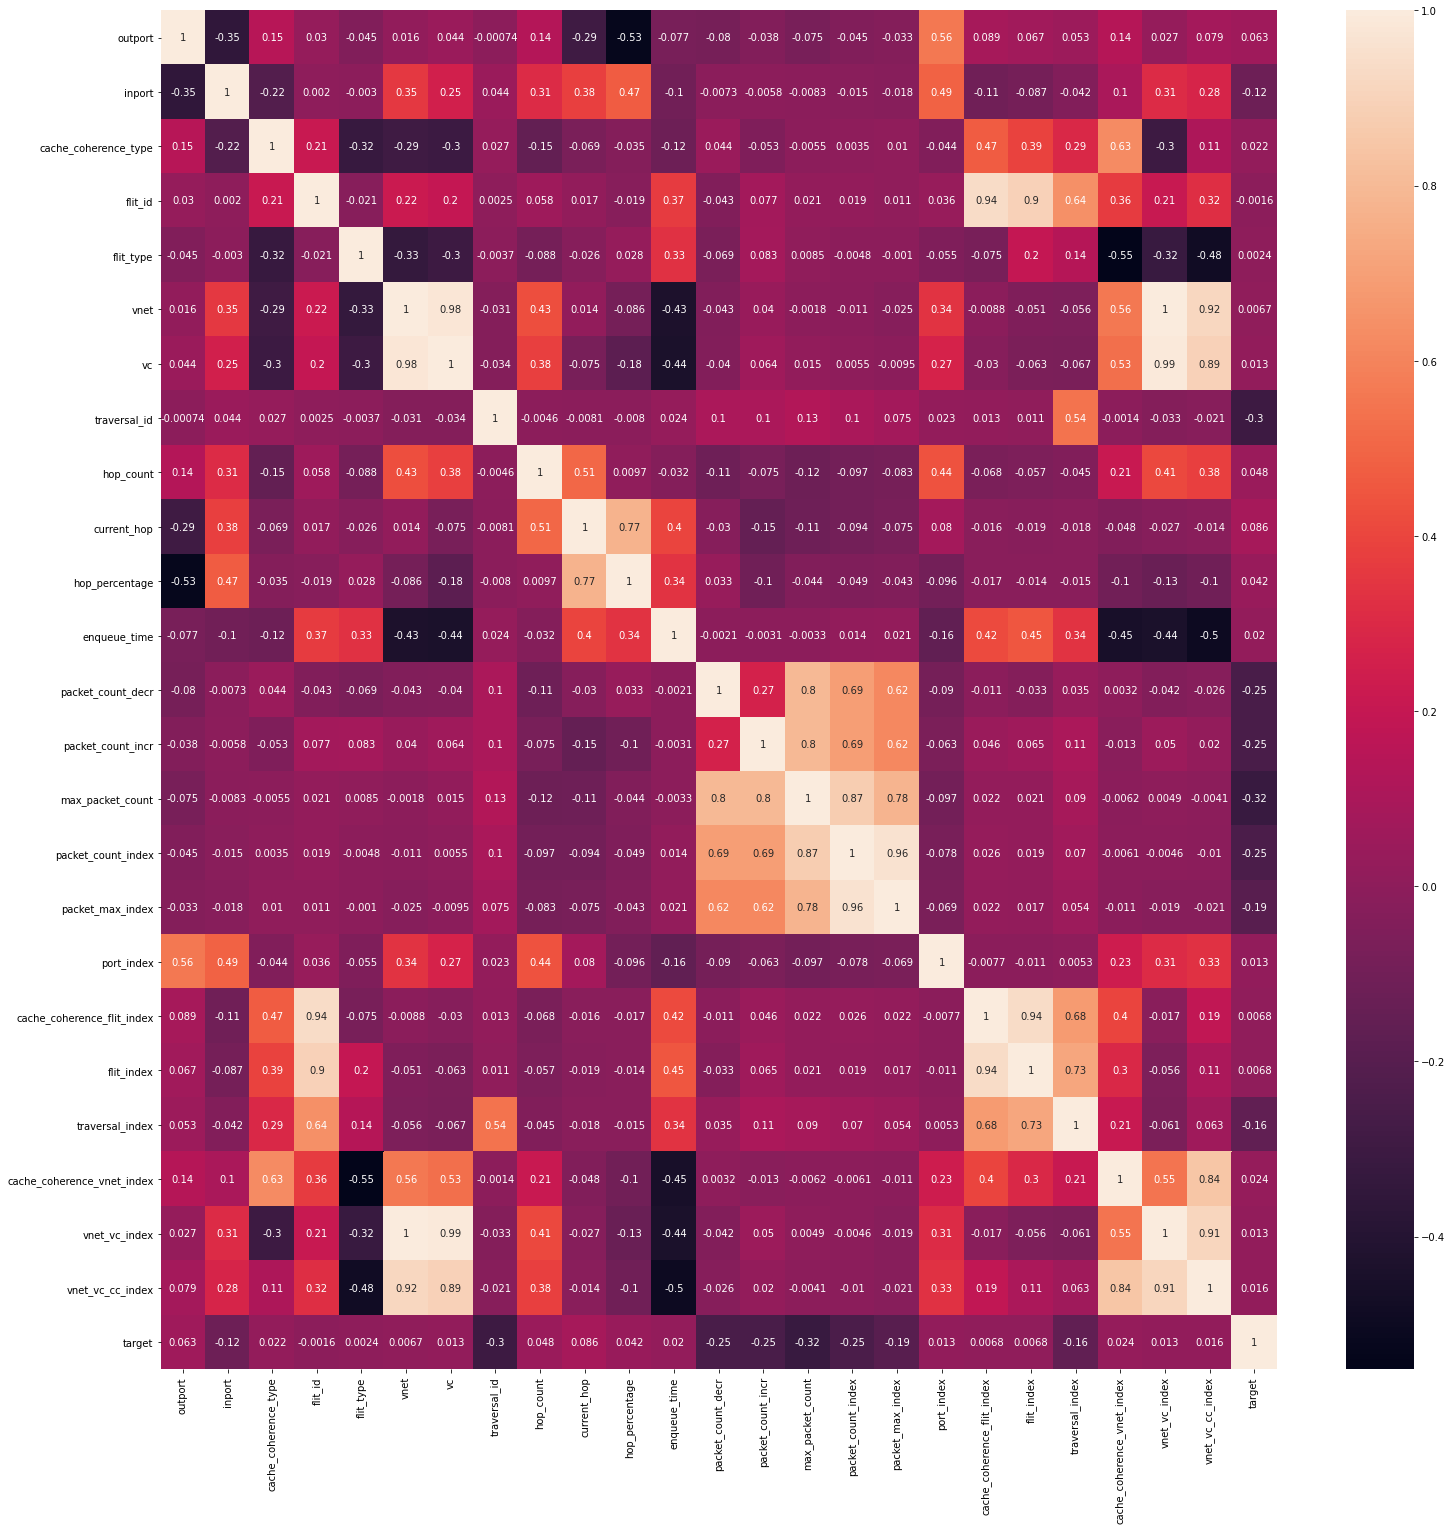

In [32]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [33]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,3,3,0,0.0,4,6,1,6,6,36,0,1,4,12,3,27,9
1,0,3,4,1,1,5,17,3,3,3,1.0,16,5,2,6,10,60,0,4,4,12,20,85,100
2,0,3,4,2,2,5,17,3,3,3,1.0,17,4,3,6,12,72,0,8,16,48,20,85,100
3,0,3,4,3,2,5,17,3,3,3,1.0,18,3,4,6,12,72,0,12,24,72,20,85,100
4,0,3,4,4,2,5,17,3,3,3,1.0,19,2,5,6,10,60,0,16,32,96,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420863,2,0,4,1,1,5,20,20062,4,0,0.0,5,1,1,1,1,1,0,4,4,80248,20,100,100
420864,2,0,4,2,2,5,20,20062,4,0,0.0,6,1,1,1,1,1,0,8,16,320992,20,100,100
420865,2,0,4,3,2,5,20,20062,4,0,0.0,7,1,1,1,1,1,0,12,24,481488,20,100,100
420866,2,0,4,4,2,5,20,20062,4,0,0.0,8,1,1,1,1,1,0,16,32,641984,20,100,100


In [34]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.500000,0.00,0.0,0.000000,0.151515,0.000000,0.151515,0.016393,0.003364,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.75,0.5,0.00,0.000000,1.0,0.727273,0.000000,0.500000,0.75,1.0,0.179104,0.121212,0.030303,0.151515,0.029508,0.005671,0.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
2,0.0,0.75,0.5,0.25,0.333333,1.0,0.727273,0.000000,0.500000,0.75,1.0,0.194030,0.090909,0.060606,0.151515,0.036066,0.006825,0.0,0.241379,0.139535,0.000013,0.944444,0.794521,1.0
3,0.0,0.75,0.5,0.50,0.333333,1.0,0.727273,0.000000,0.500000,0.75,1.0,0.208955,0.060606,0.090909,0.151515,0.036066,0.006825,0.0,0.379310,0.232558,0.000022,0.944444,0.794521,1.0
4,0.0,0.75,0.5,0.75,0.333333,1.0,0.727273,0.000000,0.500000,0.75,1.0,0.223881,0.030303,0.121212,0.151515,0.029508,0.005671,0.0,0.517241,0.325581,0.000031,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420863,0.5,0.00,0.5,0.00,0.000000,1.0,1.000000,0.666633,0.666667,0.00,0.0,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.103448,0.000000,0.029626,0.944444,1.000000,1.0
420864,0.5,0.00,0.5,0.25,0.333333,1.0,1.000000,0.666633,0.666667,0.00,0.0,0.029851,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.241379,0.139535,0.118519,0.944444,1.000000,1.0
420865,0.5,0.00,0.5,0.50,0.333333,1.0,1.000000,0.666633,0.666667,0.00,0.0,0.044776,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.177780,0.944444,1.000000,1.0
420866,0.5,0.00,0.5,0.75,0.333333,1.0,1.000000,0.666633,0.666667,0.00,0.0,0.059701,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.517241,0.325581,0.237042,0.944444,1.000000,1.0


In [35]:
train_X[train_X.duplicated()].shape

(7267, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [37]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.065574,0.290323,0.000000,0.290323,0.033210,0.011375,1.000,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.081967,0.258065,0.032258,0.290323,0.062731,0.020568,1.000,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.098361,0.225806,0.064516,0.290323,0.084871,0.027462,1.000,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.114754,0.193548,0.096774,0.290323,0.099631,0.032058,1.000,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.180328,0.161290,0.129032,0.290323,0.107011,0.034356,1.000,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50360,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,0.999967,1.0,1.00,0.800000,0.491803,0.096774,0.064516,0.161290,0.040590,0.008158,0.375,0.482759,0.302326,0.333352,0.666667,0.000000,0.395604
50361,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.999967,1.0,1.00,0.800000,0.606557,0.064516,0.096774,0.161290,0.040590,0.008158,0.375,0.655172,0.418605,0.444471,0.666667,0.000000,0.395604
50362,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.999967,1.0,1.00,0.800000,0.721311,0.032258,0.129032,0.161290,0.033210,0.006779,0.375,0.827586,0.825581,0.833388,0.666667,0.000000,0.395604
50363,0.25,0.75,0.000000,0.00,1.000000,0.0,0.111111,1.000000,1.0,1.00,0.800000,0.721311,0.000000,0.161290,0.161290,0.018450,0.004022,0.375,0.000000,0.000000,0.044443,0.000000,0.047619,0.000000


In [38]:
test_X[test_X.duplicated()].shape

(47, 24)

In [39]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(54, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.060606,0.321429,0.000000,0.321429,0.040179,0.015175,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.075758,0.285714,0.035714,0.321429,0.075893,0.027437,0.666667,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.090909,0.250000,0.071429,0.321429,0.102679,0.036634,0.666667,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.106061,0.214286,0.107143,0.321429,0.120536,0.042765,0.666667,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.0,0.25,0.200000,0.166667,0.178571,0.142857,0.321429,0.129464,0.045831,0.666667,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57951,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,0.999967,1.0,1.00,0.800000,0.454545,0.035714,0.071429,0.107143,0.022321,0.003525,0.250000,0.482759,0.302326,0.333352,0.666667,0.000000,0.395604
57952,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.999967,1.0,1.00,0.800000,0.560606,0.000000,0.107143,0.107143,0.013393,0.002299,0.250000,0.655172,0.418605,0.444471,0.666667,0.000000,0.395604
57953,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.999967,1.0,1.00,0.800000,0.666667,0.035714,0.000000,0.035714,0.004464,0.000460,0.250000,0.827586,0.825581,0.833388,0.666667,0.000000,0.395604
57954,0.25,0.75,0.000000,0.00,1.000000,0.0,0.111111,1.000000,1.0,1.00,0.800000,0.666667,0.000000,0.035714,0.035714,0.004464,0.000460,0.250000,0.000000,0.000000,0.044443,0.000000,0.047619,0.000000


In [40]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(77, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.25,0.25,0.500000,0.062500,0.322581,0.000000,0.322581,0.036900,0.013788,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.5,1.0,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.00,0.25,0.200000,0.062500,0.290323,0.032258,0.322581,0.070111,0.025164,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
2,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.200000,0.078125,0.258065,0.064516,0.322581,0.095941,0.034011,1.0,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
3,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.200000,0.093750,0.225806,0.096774,0.322581,0.114391,0.040331,1.0,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
4,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.00,0.25,0.200000,0.109375,0.193548,0.129032,0.322581,0.125461,0.044123,1.0,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61322,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.50,0.50,0.666667,0.234375,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266662,0.833333,0.000000,0.494505
61323,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.50,0.50,0.666667,0.343750,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.399996,0.833333,0.000000,0.494505
61324,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.50,0.50,0.666667,0.453125,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.533331,0.833333,0.000000,0.494505
61325,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.50,0.50,0.666667,0.562500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [41]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(23, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.0,0.25,0.2,0.065574,0.137931,0.000000,0.137931,0.016736,0.003334,1.000,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.081967,0.103448,0.034483,0.137931,0.029289,0.005417,1.000,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.098361,0.068966,0.068966,0.137931,0.033473,0.006112,1.000,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.114754,0.034483,0.103448,0.137931,0.029289,0.005417,1.000,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.0,0.25,0.2,0.180328,0.000000,0.137931,0.137931,0.016736,0.003334,1.000,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53367,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,0.999967,1.0,0.50,0.4,0.245902,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.310345,0.186047,0.222277,0.666667,0.000000,0.395604
53368,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,0.999967,1.0,0.50,0.4,0.360656,0.034483,0.000000,0.034483,0.004184,0.000417,0.375,0.482759,0.302326,0.333418,0.666667,0.000000,0.395604
53369,0.75,0.25,0.666667,0.75,0.333333,0.0,0.000000,0.999967,1.0,0.50,0.4,0.475410,0.000000,0.034483,0.034483,0.004184,0.000417,0.375,0.655172,0.418605,0.444560,0.666667,0.000000,0.395604
53370,0.75,0.25,0.666667,1.00,0.666667,0.0,0.000000,0.999967,1.0,0.50,0.4,0.590164,0.034483,0.000000,0.034483,0.004184,0.000417,0.375,0.827586,0.825581,0.833554,0.666667,0.000000,0.395604


In [42]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(41, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.75,0.500000,0.00,0.000000,1.0,0.888889,0.0,0.75,0.75,0.750000,0.179104,0.117647,0.000000,0.117647,0.012384,0.002117,0.375,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.25,0.75,0.500000,0.25,0.333333,1.0,0.888889,0.0,0.75,0.75,0.750000,0.194030,0.088235,0.029412,0.117647,0.021672,0.003439,0.375,0.241379,0.139535,0.000013,0.944444,0.920635,1.000000
2,0.25,0.75,0.500000,0.50,0.333333,1.0,0.888889,0.0,0.75,0.75,0.750000,0.208955,0.058824,0.058824,0.117647,0.024768,0.003880,0.375,0.379310,0.232558,0.000022,0.944444,0.920635,1.000000
3,0.25,0.75,0.500000,0.75,0.333333,1.0,0.888889,0.0,0.75,0.75,0.750000,0.223881,0.029412,0.088235,0.117647,0.021672,0.003439,0.375,0.517241,0.325581,0.000031,0.944444,0.920635,1.000000
4,0.25,0.75,0.500000,1.00,0.666667,1.0,0.888889,0.0,0.75,0.75,0.750000,0.283582,0.000000,0.117647,0.117647,0.012384,0.002117,0.375,0.655172,0.651163,0.000062,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76768,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,1.0,1.00,0.25,0.200000,0.074627,0.117647,0.088235,0.205882,0.058824,0.014022,1.000,0.241379,0.139535,0.177786,0.944444,0.920635,1.000000
76769,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,1.0,1.00,0.25,0.200000,0.089552,0.088235,0.117647,0.205882,0.058824,0.014022,1.000,0.379310,0.232558,0.266681,0.944444,0.920635,1.000000
76770,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,1.0,1.00,0.25,0.200000,0.104478,0.058824,0.147059,0.205882,0.052632,0.012611,1.000,0.517241,0.325581,0.355576,0.944444,0.920635,1.000000
76771,0.50,1.00,0.333333,0.00,1.000000,0.0,0.000000,1.0,0.50,0.25,0.333333,0.119403,0.029412,0.176471,0.205882,0.040248,0.009789,1.000,0.068966,0.093023,0.133338,0.333333,0.000000,0.197802


In [43]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(42, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.0,0.25,0.2,0.062500,0.264706,0.000000,0.264706,0.027864,0.008731,1.000,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.078125,0.235294,0.029412,0.264706,0.052632,0.015786,1.000,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.093750,0.205882,0.058824,0.264706,0.071207,0.021078,1.000,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.0,0.25,0.2,0.109375,0.176471,0.088235,0.264706,0.083591,0.024605,1.000,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.0,0.25,0.2,0.171875,0.147059,0.117647,0.264706,0.089783,0.026369,1.000,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53136,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,0.999967,1.0,1.00,0.8,0.296875,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.310345,0.186047,0.222277,0.666667,0.000000,0.395604
53137,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,0.999967,1.0,1.00,0.8,0.406250,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.482759,0.302326,0.333418,0.666667,0.000000,0.395604
53138,0.75,0.25,0.666667,0.75,0.333333,0.0,0.000000,0.999967,1.0,1.00,0.8,0.515625,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.655172,0.418605,0.444559,0.666667,0.000000,0.395604
53139,0.75,0.25,0.666667,1.00,0.666667,0.0,0.000000,0.999967,1.0,1.00,0.8,0.625000,0.029412,0.000000,0.029412,0.003096,0.000265,0.375,0.827586,0.825581,0.833554,0.666667,0.000000,0.395604


In [44]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(66, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.25,0.333333,0.500000,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.5,1.0,0.500000,0.00,0.000000,1.0,1.0,0.000000,0.25,0.333333,0.500000,0.063492,0.153846,0.000000,0.153846,0.020513,0.004536,1.0,0.103448,0.000000,0.000000,0.944444,1.0,1.000000
2,0.5,1.0,0.500000,0.25,0.333333,1.0,1.0,0.000000,0.25,0.333333,0.500000,0.079365,0.115385,0.038462,0.153846,0.035897,0.007371,1.0,0.241379,0.139535,0.000020,0.944444,1.0,1.000000
3,0.5,1.0,0.500000,0.50,0.333333,1.0,1.0,0.000000,0.25,0.333333,0.500000,0.095238,0.076923,0.076923,0.153846,0.041026,0.008316,1.0,0.379310,0.232558,0.000033,0.944444,1.0,1.000000
4,0.5,1.0,0.500000,0.75,0.333333,1.0,1.0,0.000000,0.25,0.333333,0.500000,0.111111,0.038462,0.115385,0.153846,0.035897,0.007371,1.0,0.517241,0.325581,0.000047,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45267,1.0,0.5,0.500000,0.75,0.333333,1.0,1.0,0.999551,1.00,0.666667,0.400000,0.174603,0.038462,0.076923,0.115385,0.025641,0.004347,1.0,0.517241,0.325581,0.355640,0.944444,1.0,1.000000
45268,1.0,0.5,0.500000,1.00,0.666667,1.0,1.0,0.999551,1.00,0.666667,0.400000,0.238095,0.000000,0.115385,0.115385,0.015385,0.002835,1.0,0.655172,0.651163,0.666831,0.944444,1.0,1.000000
45269,1.0,0.5,0.833333,0.00,0.000000,0.0,0.0,1.000000,0.50,0.666667,0.666667,0.126984,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.172414,0.023256,0.066707,0.833333,0.0,0.494505
45270,1.0,0.5,0.833333,0.25,0.333333,0.0,0.0,1.000000,0.50,0.666667,0.666667,0.238095,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266848,0.833333,0.0,0.494505


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [46]:
train_Y = df['target']
train_Y.value_counts()

0    263788
1    157080
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  9006.117934
7                 traversal_id  4833.023618
13           packet_count_incr  4506.244923
12           packet_count_decr  4499.876895
15          packet_count_index  3385.746116
16            packet_max_index  1869.568681
20             traversal_index  1467.222774
1                       inport   999.154060
9                  current_hop   479.472835
0                      outport   311.803208
10              hop_percentage   137.963367
8                    hop_count    83.992404
22               vnet_vc_index    24.320688
21  cache_coherence_vnet_index    19.736970
6                           vc    17.970491
17                  port_index    16.917868
11                enqueue_time    16.898324


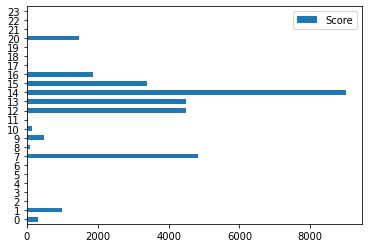

In [49]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [52]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 72.73251082585375
Test Prediction  72.62812745028155


In [54]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  40.21443462722129


In [55]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  47.943267306232315


In [56]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  44.00834868817976


In [57]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  39.292138199805144


In [58]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  35.08525132533573


In [59]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  36.623322858056866


In [60]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  64.52995228839018


In [61]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
22,vnet_vc_index,72.463044
2,cache_coherence_type,8.681239
16,packet_max_index,5.076002
18,cache_coherence_flit_index,3.885798
17,port_index,2.701232
9,current_hop,1.646951
15,packet_count_index,0.926395
4,flit_type,0.722341
10,hop_percentage,0.605645
20,traversal_index,-0.175012


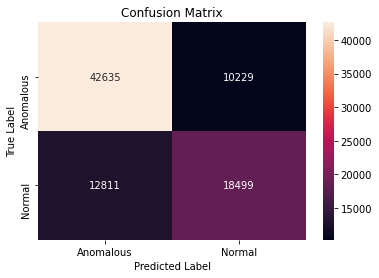

In [62]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     52864
           1       0.64      0.59      0.62     31310

    accuracy                           0.73     84174
   macro avg       0.71      0.70      0.70     84174
weighted avg       0.72      0.73      0.72     84174



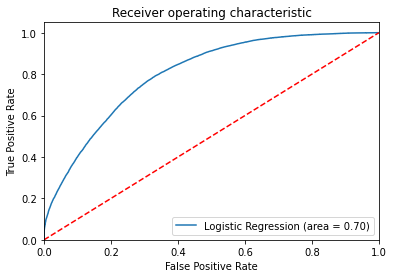

In [64]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

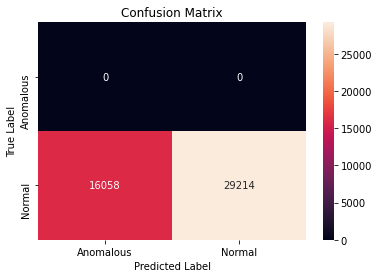

In [65]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [66]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.78     45272

    accuracy                           0.65     45272
   macro avg       0.50      0.32      0.39     45272
weighted avg       1.00      0.65      0.78     45272



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [67]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [69]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 89.91161113652159
Test Prediction  84.08297098866633


In [70]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  81.75121612230716


In [71]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  59.7228932293464


In [72]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  68.76253526179333


In [73]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  70.58944765045342


In [74]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  84.87749599468563


In [75]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  73.3162718051975


In [76]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  45.17140837603817


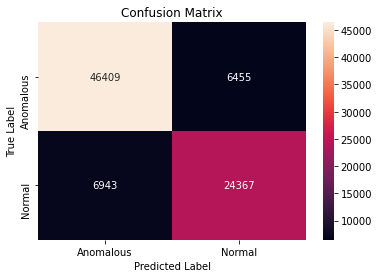

In [77]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [78]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     52864
           1       0.79      0.78      0.78     31310

    accuracy                           0.84     84174
   macro avg       0.83      0.83      0.83     84174
weighted avg       0.84      0.84      0.84     84174



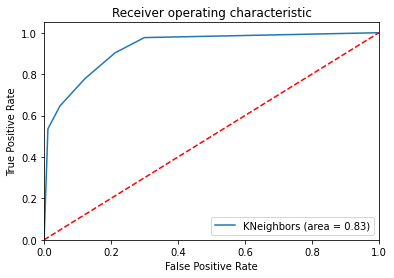

In [79]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

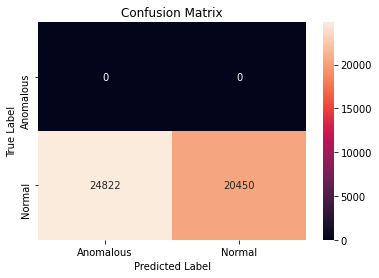

In [80]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [81]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.45      0.62     45272

    accuracy                           0.45     45272
   macro avg       0.50      0.23      0.31     45272
weighted avg       1.00      0.45      0.62     45272



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [83]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [85]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 61.47005886650787
Test Prediction Score 61.42870720174876


In [86]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 34.291670803137094


In [87]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  41.629857132997444


In [88]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  42.99248291943189


In [89]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  36.61283069774414


In [90]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  47.927005587901995


In [91]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  35.6786661899475


In [92]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  71.19632443894682


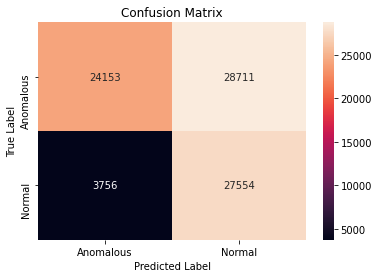

In [93]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.46      0.60     52864
           1       0.49      0.88      0.63     31310

    accuracy                           0.61     84174
   macro avg       0.68      0.67      0.61     84174
weighted avg       0.73      0.61      0.61     84174



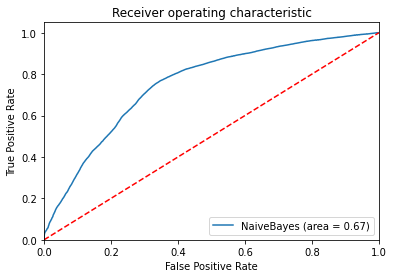

In [95]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [96]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [97]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 269355 samples, validate on 67339 samples
Epoch 1/10
269355/269355 [==============================] - 9s 34us/step - loss: 0.1881 - accuracy: 0.6982 - val_loss: 0.1713 - val_accuracy: 0.7334
Epoch 2/10
269355/269355 [==============================] - 9s 35us/step - loss: 0.1672 - accuracy: 0.7424 - val_loss: 0.1640 - val_accuracy: 0.7442
Epoch 3/10
269355/269355 [==============================] - 9s 34us/step - loss: 0.1636 - accuracy: 0.7485 - val_loss: 0.1619 - val_accuracy: 0.7504
Epoch 4/10
269355/269355 [==============================] - 10s 36us/step - loss: 0.1623 - accuracy: 0.7494 - val_loss: 0.1614 - val_accuracy: 0.7483
Epoch 5/10
269355/269355 [==============================] - 9s 34us/step - loss: 0.1617 - accuracy: 0.7502 - val_loss: 0.1606 - val_accuracy: 0.7526
Epoch 6/10
269355/269355 [==============================] - 9s 34us/step - loss: 0.1614 - accuracy: 0.7505 - val_loss: 0.1603 - val_accuracy: 0.7501
Epoch 7/10
269355/269355 [============================

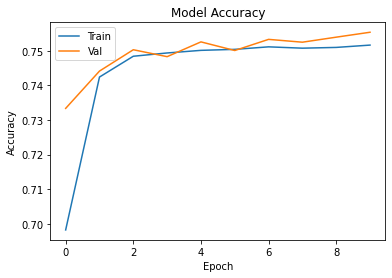

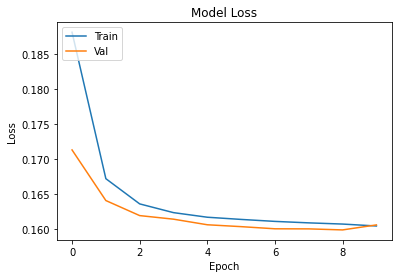

In [98]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [99]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.91%


In [100]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 47.84%


In [101]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.54%


In [102]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 47.34%


In [103]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 41.08%


In [104]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.44%


In [105]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 45.85%


In [106]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.66%


3-Layer Neural Network

In [107]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 269355 samples, validate on 67339 samples
Epoch 1/30
269355/269355 [==============================] - 9s 33us/step - loss: 0.2210 - accuracy: 0.6338 - val_loss: 0.1970 - val_accuracy: 0.6815
Epoch 2/30
269355/269355 [==============================] - 9s 33us/step - loss: 0.1866 - accuracy: 0.7011 - val_loss: 0.1803 - val_accuracy: 0.7166
Epoch 3/30
269355/269355 [==============================] - 9s 34us/step - loss: 0.1745 - accuracy: 0.7320 - val_loss: 0.1668 - val_accuracy: 0.7478
Epoch 4/30
269355/269355 [==============================] - 9s 34us/step - loss: 0.1629 - accuracy: 0.7520 - val_loss: 0.1586 - val_accuracy: 0.7592
Epoch 5/30
269355/269355 [==============================] - 9s 34us/step - loss: 0.1572 - accuracy: 0.7590 - val_loss: 0.1543 - val_accuracy: 0.7650
Epoch 6/30
269355/269355 [==============================] - 9s 34us/step - loss: 0.1537 - accuracy: 0.7633 - val_loss: 0.1516 - val_accuracy: 0.7662
Epoch 7/30
269355/269355 [=============================

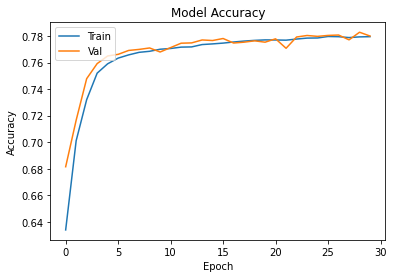

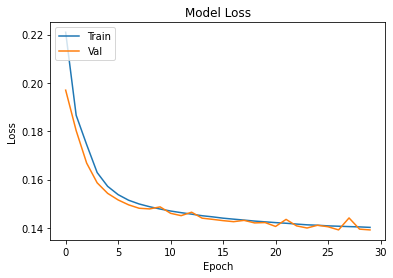

In [108]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [109]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.59%


In [110]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 94.21%
accuracy: 63.76%
accuracy: 90.74%
accuracy: 89.31%
accuracy: 96.24%
accuracy: 86.36%
accuracy: 10.92%


4-Layer Neural Network



In [111]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 269355 samples, validate on 67339 samples
Epoch 1/30
269355/269355 [==============================] - 9s 34us/step - loss: 0.2276 - accuracy: 0.6377 - val_loss: 0.2172 - val_accuracy: 0.6686
Epoch 2/30
269355/269355 [==============================] - 9s 34us/step - loss: 0.2150 - accuracy: 0.6699 - val_loss: 0.2128 - val_accuracy: 0.6729
Epoch 3/30
269355/269355 [==============================] - 10s 35us/step - loss: 0.2130 - accuracy: 0.6744 - val_loss: 0.2115 - val_accuracy: 0.6766
Epoch 4/30
269355/269355 [==============================] - 9s 35us/step - loss: 0.2122 - accuracy: 0.6765 - val_loss: 0.2107 - val_accuracy: 0.6779
Epoch 5/30
269355/269355 [==============================] - 9s 34us/step - loss: 0.2111 - accuracy: 0.6790 - val_loss: 0.2095 - val_accuracy: 0.6819
Epoch 6/30
269355/269355 [==============================] - 9s 35us/step - loss: 0.2100 - accuracy: 0.6808 - val_loss: 0.2083 - val_accuracy: 0.6836
Epoch 7/30
269355/269355 [============================

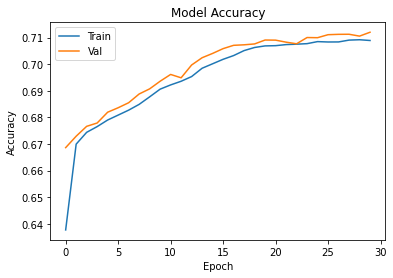

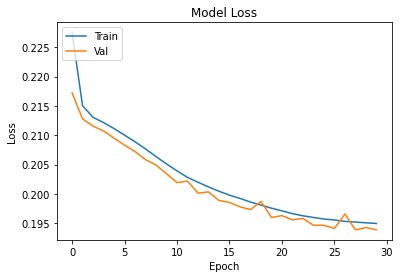

In [112]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [113]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.02%


In [114]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.80%
accuracy: 79.57%
accuracy: 88.51%
accuracy: 80.97%
accuracy: 93.60%
accuracy: 78.16%
accuracy: 12.61%


5-Layer Neural Network Optimized

In [115]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 269355 samples, validate on 67339 samples
Epoch 1/100
269355/269355 [==============================] - 17s 63us/step - loss: 0.1331 - accuracy: 0.7845 - val_loss: 0.1126 - val_accuracy: 0.8065
Epoch 2/100
269355/269355 [==============================] - 16s 61us/step - loss: 0.1171 - accuracy: 0.8043 - val_loss: 0.1097 - val_accuracy: 0.8111
Epoch 3/100
269355/269355 [==============================] - 16s 60us/step - loss: 0.1132 - accuracy: 0.8092 - val_loss: 0.1074 - val_accuracy: 0.8170
Epoch 4/100
269355/269355 [==============================] - 16s 61us/step - loss: 0.1113 - accuracy: 0.8128 - val_loss: 0.1087 - val_accuracy: 0.8170
Epoch 5/100
269355/269355 [==============================] - 19s 69us/step - loss: 0.1100 - accuracy: 0.8145 - val_loss: 0.1040 - val_accuracy: 0.8245
Epoch 6/100
269355/269355 [==============================] - 17s 64us/step - loss: 0.1094 - accuracy: 0.8151 - val_loss: 0.1037 - val_accuracy: 0.8231
Epoch 7/100
269355/269355 [================

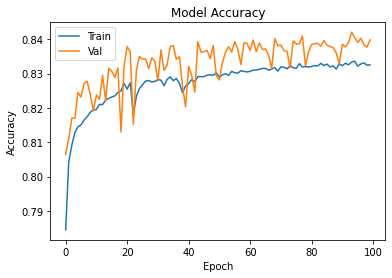

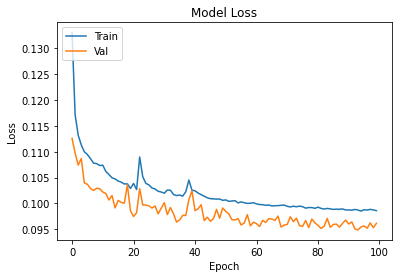

In [116]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [117]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.40%


In [118]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.18%
accuracy: 54.89%
accuracy: 70.07%
accuracy: 66.54%
accuracy: 92.91%
accuracy: 73.86%
accuracy: 42.30%


In [119]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 269355 samples, validate on 67339 samples
Epoch 1/50
269355/269355 [==============================] - 21s 76us/step - loss: 0.1378 - accuracy: 0.7784 - val_loss: 0.1210 - val_accuracy: 0.8038
Epoch 2/50
269355/269355 [==============================] - 22s 80us/step - loss: 0.1193 - accuracy: 0.8000 - val_loss: 0.1141 - val_accuracy: 0.8115
Epoch 3/50
269355/269355 [==============================] - 19s 71us/step - loss: 0.1158 - accuracy: 0.8045 - val_loss: 0.1081 - val_accuracy: 0.8171
Epoch 4/50
269355/269355 [==============================] - 19s 72us/step - loss: 0.1135 - accuracy: 0.8081 - val_loss: 0.1083 - val_accuracy: 0.8174
Epoch 5/50
269355/269355 [==============================] - 20s 73us/step - loss: 0.1126 - accuracy: 0.8088 - val_loss: 0.1051 - val_accuracy: 0.8204
Epoch 6/50
269355/269355 [==============================] - 19s 70us/step - loss: 0.1123 - accuracy: 0.8086 - val_loss: 0.1081 - val_accuracy: 0.8196
Epoch 7/50
269355/269355 [=======================

In [120]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.66%


In [121]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.13%
accuracy: 57.40%
accuracy: 79.33%
accuracy: 66.97%
accuracy: 94.08%
accuracy: 74.88%
accuracy: 34.59%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [123]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [125]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.9502753241816
Test Prediction Score 90.03849169577303


In [126]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 79.04100069492704
Test Prediction Score 67.99123472979501
Test Prediction Score 80.89585337616384
Test Prediction Score 70.69811886382372
Test Prediction Score 90.33514386568194
Test Prediction Score 74.7708925311906
Test Prediction Score 42.59365612298993


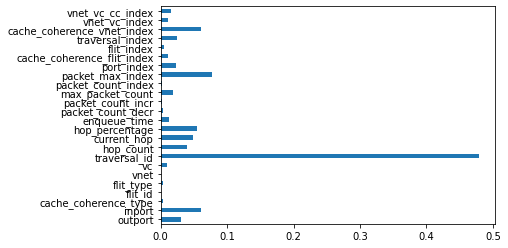

In [127]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

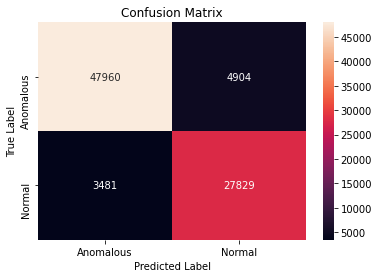

In [128]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [129]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     52864
           1       0.85      0.89      0.87     31310

    accuracy                           0.90     84174
   macro avg       0.89      0.90      0.89     84174
weighted avg       0.90      0.90      0.90     84174



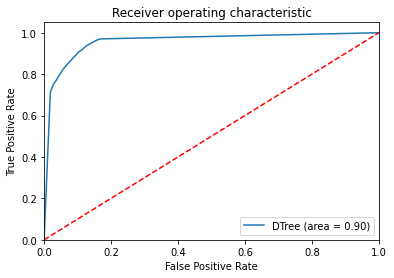

In [130]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [134]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 95.83093253815036
Test Prediction Score 91.39164112433768


In [135]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 78.92782686389359
Test Prediction Score 67.55987300710883
Test Prediction Score 80.27622417532245
Test Prediction Score 70.68875065577457
Test Prediction Score 90.47581832154533
Test Prediction Score 74.40206243766583
Test Prediction Score 42.56935854391235


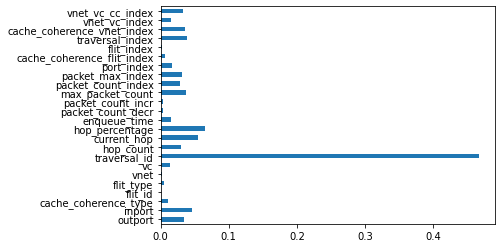

In [136]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

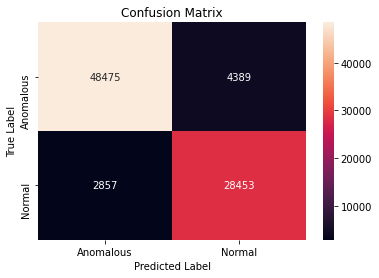

In [137]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [138]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     52864
           1       0.87      0.91      0.89     31310

    accuracy                           0.91     84174
   macro avg       0.91      0.91      0.91     84174
weighted avg       0.92      0.91      0.91     84174



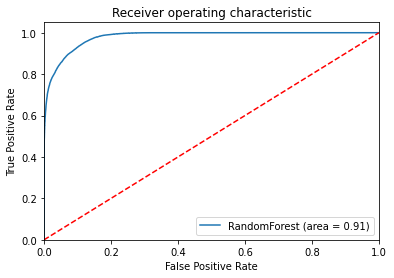

In [139]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [141]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [143]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.19392682970295
Test Prediction Score 94.92123458550145


In [144]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 75.12161223071577
Test Prediction Score 65.59976533922286
Test Prediction Score 80.00717465390449
Test Prediction Score 66.24259911564117
Test Prediction Score 87.56073098615398
Test Prediction Score 70.51241037993263
Test Prediction Score 29.665135182894502


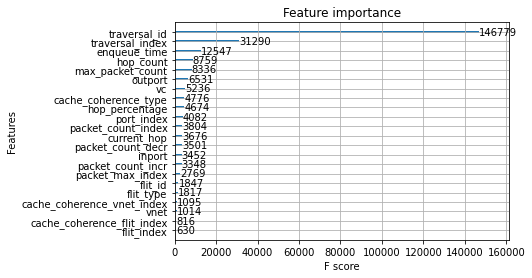

In [145]:
plot_importance(xgbc)
plt.show()

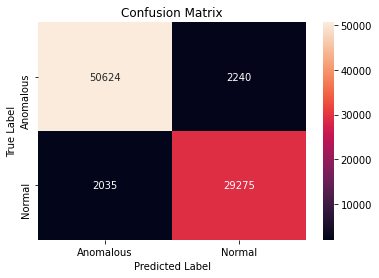

In [146]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [147]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     52864
           1       0.93      0.94      0.93     31310

    accuracy                           0.95     84174
   macro avg       0.95      0.95      0.95     84174
weighted avg       0.95      0.95      0.95     84174



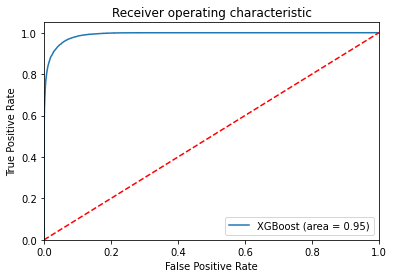

In [148]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [150]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [152]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 88.36599404800798
Test Prediction Score 87.3143726091192


In [153]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 72.03216519408319
Test Prediction Score 58.38567188901925
Test Prediction Score 75.81326332610433
Test Prediction Score 63.128606760098926
Test Prediction Score 87.06185768434214
Test Prediction Score 68.83762066953952
Test Prediction Score 35.7594097897155


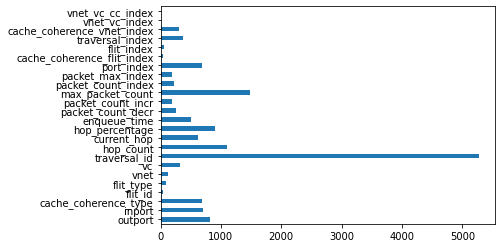

In [154]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

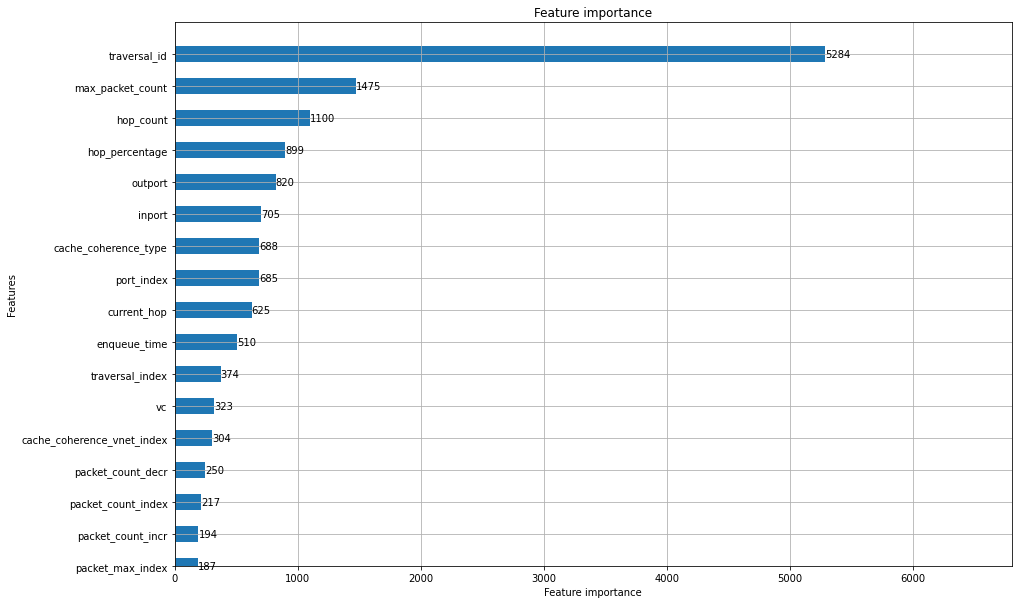

In [155]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [156]:
sorted(gbm.feature_importances_,reverse=True)

[5284,
 1475,
 1100,
 899,
 820,
 705,
 688,
 685,
 625,
 510,
 374,
 323,
 304,
 250,
 217,
 194,
 187,
 122,
 91,
 58,
 48,
 39,
 2,
 0]

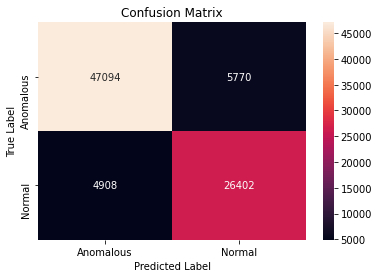

In [157]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [158]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     52864
           1       0.82      0.84      0.83     31310

    accuracy                           0.87     84174
   macro avg       0.86      0.87      0.86     84174
weighted avg       0.87      0.87      0.87     84174



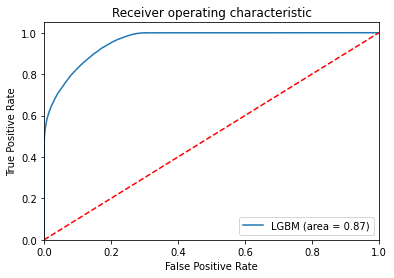

In [159]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()